In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
def e_metrics(x1, x2):
    distance = 0
    
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [3]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

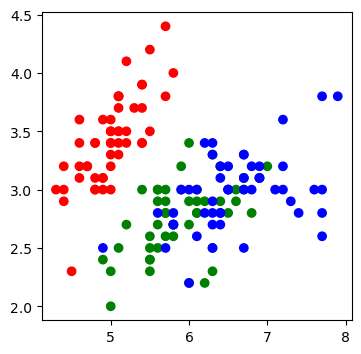

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [6]:
def knn(x_train, y_train, x_test, k):
    answers = []
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

In [7]:
def knn_modified(x_train, y_train, x_test, k):
    answers = []
    
    for x in x_test:
        test_distances = []
        weights = list(map(lambda x: 1 / x, np.linspace(1, k, k)))
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))

        classes = {class_item: 0 for class_item in set(y_train)}
        
        weight_index = 0
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += weights[weight_index]
            weight_index += 1

        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [8]:
ks = [1, 3, 5, 10, 20, 50]

for k in ks:
    y_pred = knn(X_train, y_train, X_test, k)
    y_pred_modified = knn_modified(X_train, y_train, X_test, k)
    print(f'Точность алгоритма при k = {k}: \t\t {accuracy_score(y_pred, y_test):.3f}')
    print(f'Точность алгоритма с весом при k = {k}: \t {accuracy_score(y_pred_modified, y_test):.3f}')
    print()

Точность алгоритма при k = 1: 		 0.667
Точность алгоритма с весом при k = 1: 	 0.667

Точность алгоритма при k = 3: 		 0.733
Точность алгоритма с весом при k = 3: 	 0.667

Точность алгоритма при k = 5: 		 0.867
Точность алгоритма с весом при k = 5: 	 0.733

Точность алгоритма при k = 10: 		 0.833
Точность алгоритма с весом при k = 10: 	 0.767

Точность алгоритма при k = 20: 		 0.833
Точность алгоритма с весом при k = 20: 	 0.800

Точность алгоритма при k = 50: 		 0.733
Точность алгоритма с весом при k = 50: 	 0.833

